## Importing Libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

## Loading Images (Dataloader)

In [2]:
# Define input image dimensions
img_height = 224
img_width = 224
batch_size = 32

In [3]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 180 files belonging to 2 classes.
Using 144 files for training.
Found 180 files belonging to 2 classes.
Using 36 files for validation.
Found 20 files belonging to 2 classes.


## Show loaded Images

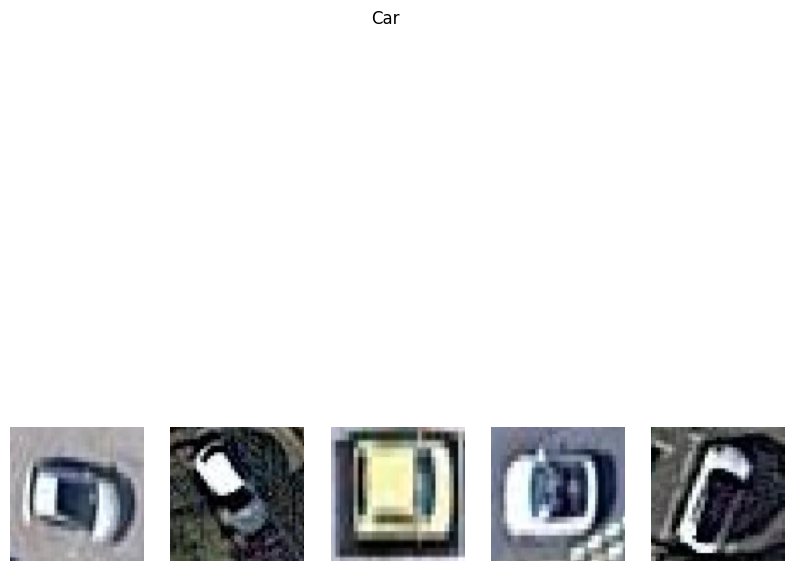

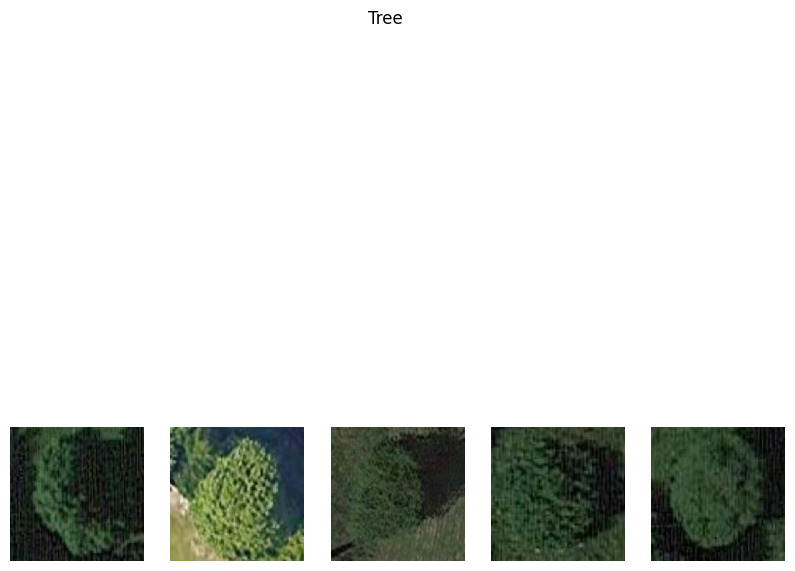

In [4]:
# Define the directories and classes
train_dir = 'train'
classes = ['Car', 'Tree']

# Set the number of images to display per class
num_images = 5

# Loop over the classes and randomly select and display some images
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    class_images = os.listdir(class_dir)
    random_images = random.sample(class_images, num_images)
    
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(class_dir, image_name)
        image = load_img(image_path, target_size=(224, 224))
        image_arr = np.array(image)
        
        axes[i].imshow(image_arr)
        axes[i].axis('off')
    
    fig.suptitle(class_name)
    plt.show()


In [5]:
# Configure dataset for performance
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

## DenseNet Model (Proposed solution)

In [6]:
# Define the model
num_classes = 2
model = tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_shape=(img_height, img_width, 3),
    classes=num_classes,
)

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [7]:
# Train the model
epochs = 10
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=epochs
)

Epoch 1/10


C:\Users\haris\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 152s 26s/step - loss: 0.4938 - accuracy: 0.8264 - val_loss: 28.0079 - val_accuracy: 0.3889
Epoch 2/10
5/5 [==============================] - 116s 22s/step - loss: 0.1778 - accuracy: 0.9444 - val_loss: 108.8827 - val_accuracy: 0.3889
Epoch 3/10
5/5 [==============================] - 113s 22s/step - loss: 0.1075 - accuracy: 0.9653 - val_loss: 717.3874 - val_accuracy: 0.3889
Epoch 4/10
5/5 [==============================] - 113s 22s/step - loss: 0.0163 - accuracy: 0.9931 - val_loss: 1004.2118 - val_accuracy: 0.3889
Epoch 5/10
5/5 [==============================] - 107s 21s/step - loss: 0.0193 - accuracy: 0.9931 - val_loss: 1244.7076 - val_accuracy: 0.3889
Epoch 6/10
5/5 [==============================] - 135s 26s/step - loss: 0.0478 - accuracy: 0.9931 - val_loss: 1511.9205 - val_accuracy: 0.3889
Epoch 7/10
5/5 [==============================] - 121s 24s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1279.2593 - val_accuracy: 0.3889
Epoch 8/10
5/5

## Experimental tests and evaluations

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print("Test F1 Score:", test_acc)

1/1 [==============================] - 4s 4s/step - loss: 463.2037 - accuracy: 0.5000
Test F1 Score: 0.5


## Actual vs Predicted

In [9]:
# Get the class names 
class_names = ['Car', 'Tree']
# Get a batch of images and labels from the test set
test_images, test_labels = next(iter(test_ds))

# Get the predicted probabilities and classes for the test set
probabilities = model.predict(test_images)
predicted_classes = np.argmax(probabilities, axis=1)

for i in range(len(test_labels)):
    print(f"Actual: {class_names[test_labels[i]]} ({test_labels[i]})\nPredicted: {class_names[predicted_classes[i]]} ({predicted_classes[i]})")



1/1 [==============================] - 7s 7s/step
Actual: Car (0)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Tree (1)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
Actual: Car (0)
Predicted: Car (0)
